In [2]:
!pip install datasets
!pip install langchain
!pip install ctransformers
!pip install nltk
!pip install faiss-cpu
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [4]:
from datasets import load_dataset


dataset = load_dataset("hugginglearners/netflix-shows", split="train")
df = pd.DataFrame(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
df = pd.DataFrame(dataset)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,None,None,None,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [8]:
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['description'])


In [10]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)
df['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['description', 'cluster_label']], df['listed_in'], test_size=0.2, random_state=42)
X_train_tfidf = vectorizer.transform(X_train['description'])
X_test_tfidf = vectorizer.transform(X_test['description'])

import scipy
X_train_tfidf = scipy.sparse.hstack((X_train_tfidf, np.array(X_train['cluster_label'])[:,None]))
X_test_tfidf = scipy.sparse.hstack((X_test_tfidf, np.array(X_test['cluster_label'])[:,None]))

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

KeyboardInterrupt: 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from collections import defaultdict

X = df['description']
y = df['listed_in']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Define and train the logistic regression model
model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=1000)),
    ("clf", LogisticRegression(max_iter=1000))
])

# Train the model with the training data
model.fit(X_train, y_train)

# Predict genres for the descriptions in the entire dataset
predicted_genres = model.predict(df['description'])


In [14]:
genre_buckets = defaultdict(list)

# populate buckets w/ initial predictions
for i, (description, predicted_genre) in enumerate(zip(df['description'], predicted_genres)):
    genre_buckets[predicted_genre].append({
        'id': df['show_id'][i],
        'description': description,
        'metadata': {
            'actual_genre': df['listed_in'][i],
            'predicted_genre': predicted_genre,
        }
    })

In [15]:
temp_genre_buckets = defaultdict(list)
# Determine incorrect items that do not fit each category
for genre, items in genre_buckets.items():
    for item in items:
        actual_genre = item['metadata']['actual_genre'].split(', ')[0]  # Simplifying to primary genre
        if actual_genre != genre:
            temp_genre_buckets[actual_genre].append(item)

In [18]:
for genre, items in temp_genre_buckets.items():
    for item in items:
        # add item to correct bucket
        genre_buckets[genre].append(item)
        print(f"Added to {genre}: {item}")

        # identifify the old genre
        old_genre = item['metadata']['predicted_genre']

        # ensure the item exists in the old genre bucket before removing
        if item in genre_buckets[old_genre]:
            genre_buckets[old_genre].remove(item)
            print(f"Removed from {old_genre}: {item}")
        else:
            print(f"Item not found in {old_genre}, could not remove: {item}")

Streaming output truncated to the last 5000 lines.
Added to Comedies: {'id': 's1648', 'description': 'A pair of former batchmates cross paths 30 years later when they wind up as new neighbors, and their reconnection soon blossoms into something more.', 'metadata': {'actual_genre': 'Comedies, International Movies, Romantic Movies', 'predicted_genre': 'Comedies, International Movies, Romantic Movies'}}
Removed from Comedies, International Movies, Romantic Movies: {'id': 's1648', 'description': 'A pair of former batchmates cross paths 30 years later when they wind up as new neighbors, and their reconnection soon blossoms into something more.', 'metadata': {'actual_genre': 'Comedies, International Movies, Romantic Movies', 'predicted_genre': 'Comedies, International Movies, Romantic Movies'}}
Added to Comedies: {'id': 's1786', 'description': "Fed up with being single on holidays, two strangers agree to be each other's platonic plus-ones all year long, only to catch real feelings along the 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# calculating the correct accuracy
accuracies = {}
for genre, items in genre_buckets.items():
    correct_predictions = sum(1 for item in items if genre in item['metadata']['actual_genre'])
    total_predictions = len(items)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracies[genre] = accuracy

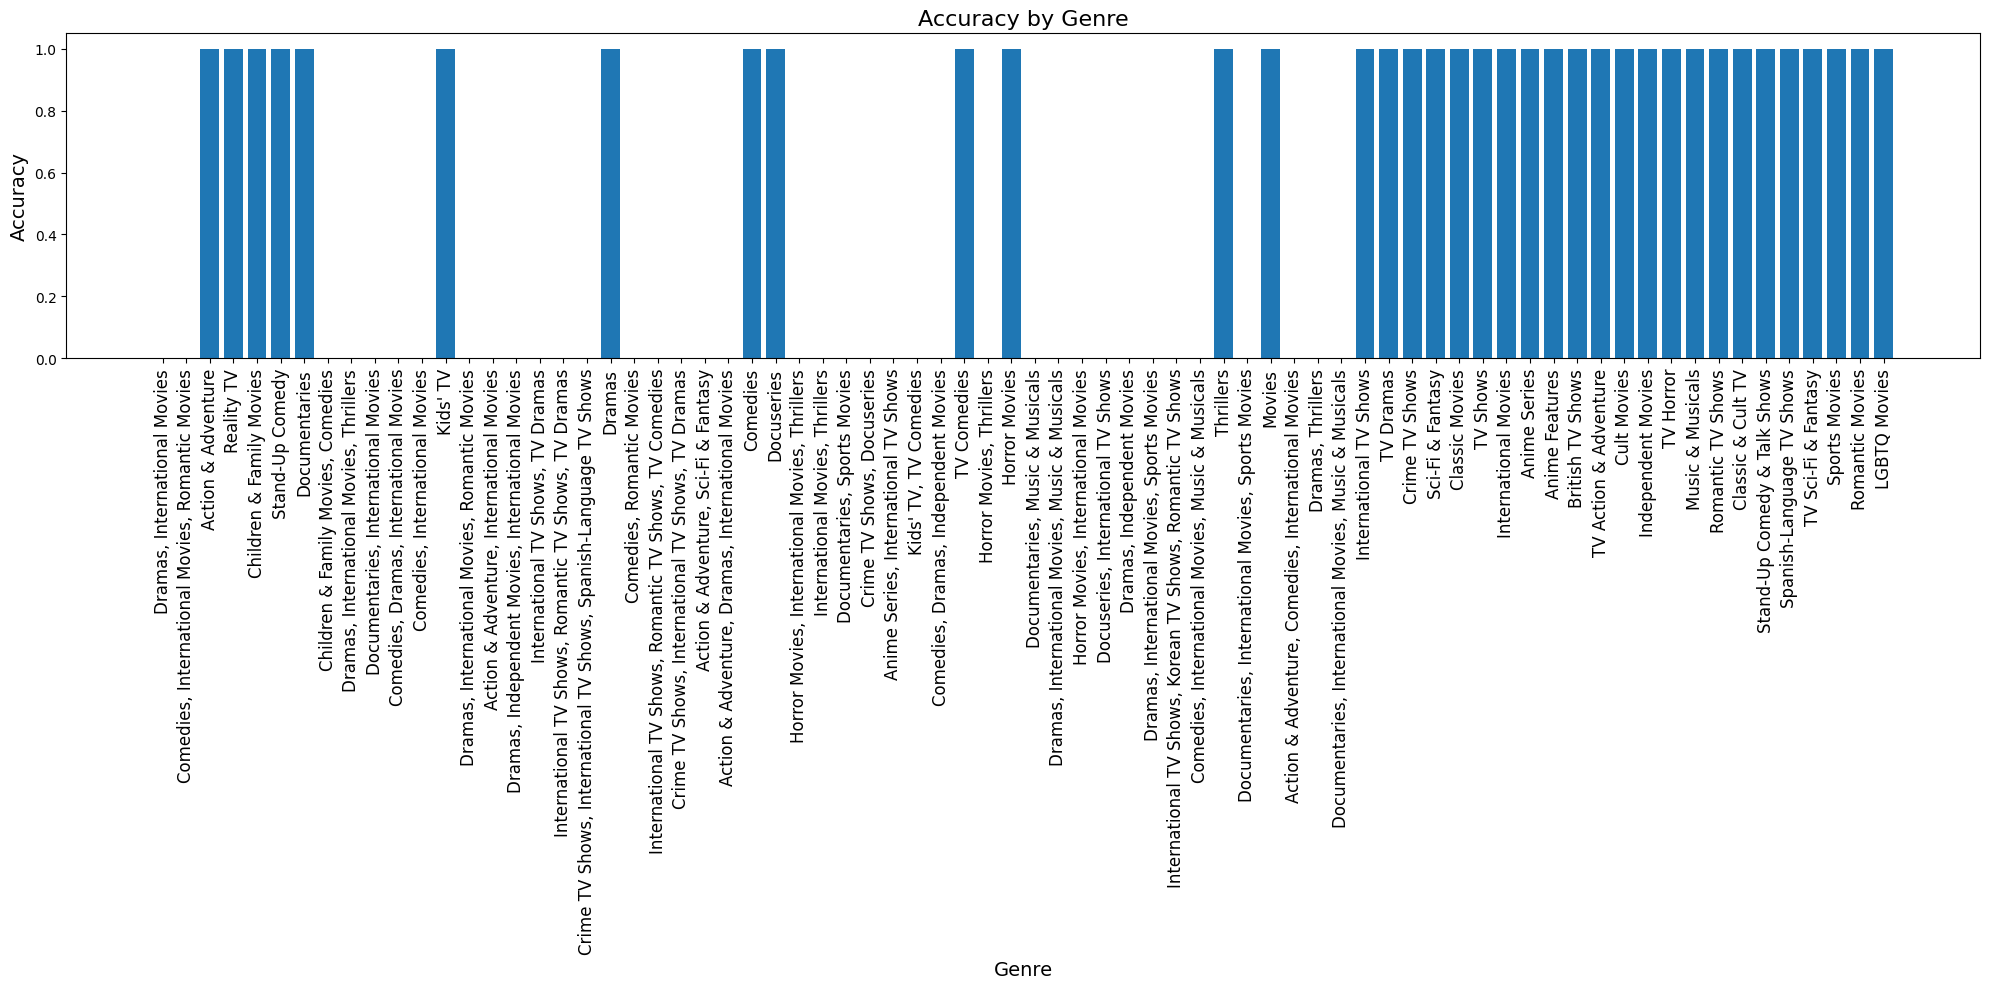

In [20]:
import matplotlib.pyplot as plt

#plot accuracies
plt.figure(figsize=(20, 10))  # Increase the figure size (width, height) as needed
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy by Genre', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Rotate the labels to vertical or to a suitable angle
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

In [ ]:
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=1))

                                                                                 precision    recall  f1-score   support

                                                             Action & Adventure       0.26      0.41      0.32        27
                   Action & Adventure, Anime Features, Children & Family Movies       1.00      0.00      0.00         1
                             Action & Adventure, Anime Features, Classic Movies       1.00      0.00      0.00         1
                       Action & Adventure, Anime Features, International Movies       1.00      0.00      0.00         8
                           Action & Adventure, Anime Features, Sci-Fi & Fantasy       1.00      0.00      0.00         1
                   Action & Adventure, Children & Family Movies, Classic Movies       1.00      0.00      0.00         1
                         Action & Adventure, Children & Family Movies, Comedies       1.00      0.00      0.00         1
                 Action & Adven